<a href="https://colab.research.google.com/github/jiamila191/Detecci-n-de-intrusiones-ML/blob/main/Entrega_TrabajoFinal_Jiamila_Molina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detección de Intrusiones en Redes con Machine Learning (Random Forest)

- Jiamila Molina

# Introducción

En ciberseguridad la detección de intrusiones y actividades maliciosas en redes es fundamental para proteger los sistemas y datos, garantizando la integridad, confidencialidad y disponibilidad de estos.

Entre las solucines para esto se encuentran los sistemas de detección y prevención de intrusiones IDS e IPS. Un IDS (Intrusion Detection System) se encarga de monitorear el tráfico en busca de patrones anómalos o maliciosos y genera alertas ante comportamiento malicioso. Minetras que IPS (Intrusion Prevention System) también actua para bloquearl estas amenazas.

Dentro de estas categorias se encuentran los NIDS (Network Intrusion Detection Systems) una de las primeras líneas de defenza. Es una herramienta de ciberseguridad diseñada para monitorizar y analizar el tráfico etrante y saliente de red, con el objetivo de detectar actividades maliciosas.

Este trabajo presenta el desarrollo de un modelo utilizando el algoritmo Random Forest, para clasificar el tráfico de red como malicioso (1) o normal (0) basado en el dataset UNSW-NB15, un conjunto de datos utilizado en muhcas investigaciones de ciberseguridad, el cual incluye múltiples tipos de ataque.

# Contexto del problema

El crecimiento exponencial de los ciberataques representa una amenaza crítica para organizaciones y usurios del mundo. Según el informe de Verizon DBIR 2023, el 74% de las brechas de seguridad incluyen el componente humano.

En el contexto de nuestro país, el Centro Uruguayo de Tecnologías de la Información(CUTI) destaca el aumento de ciberataques en el país, y a pesar de esta tendencia, una gran parte del sector empresarial y usuarios en general no están preparados para enfrentar estas amenazas.  Alrededor de 150.000 organizaciones en Uruguay nunca han realizado alguna evaluacion del estado de su ciberceguridad, y que un total de 948.850 usuarios uruguayos fueron víctimas de inentos de fraude en 2024.

Además se menciona que, el 86% de las empresas uruguayas no realiza evaluaciones regulares de su estado de ciberseguridad, y el 66% ni siquiera considera necesario hacerlo. Esta falta de preparación refuerza la importancia de desarrollar herramientas que permitan detectar actividades maliciosas en la red de manera eficiente.

#Justificación

En este contexto el uso de técnicas como machine learning ofrece las siguientes ventajas:
- Identificar patrones complejos que podrían pasar desapercibidos con metodos convencionales.
- Reducir significativamente los tiempos de respuesta ante incidentes de seguridad
- Esclar la protección en entornos de red dinámicos y con gran volúmen de tráfico


La selección de Random Forest se basa en sus ventajas técnicas para problemas de detección de intrusiones:

- Manejo de datos balanceados: mediante el parametro class_weight='balanced', ajusta automáticamente los pesos para clases minoritarias.

- Robustez ante otuliers: los valores extremos en métricas de red no afectan significativamente su rendimineto.

- Eficiencia: puede manejar grandes conjuntos de datos

# Objetivos

- Análisis y comprensión del conjunto de dats

- Desarrollar un modelo con Random Forest que clasifiquen el trafico como 0 (Normal) y 1 (malicioso) para identificar el tráfico malisioso en redes

- Análisis de resultados y evaluación del modelo

- Comparar Random Forest con otro modelo de Machine Learning




# Descripción del dataset [UNSW-NB15](https://www.kaggle.com/datasets/mrwellsdavid/unsw-nb15)

El dataset UNSW-NB15 es un conjunto de datos para la deteccion de intrusiones en redes (NIDS), creado por Australian Centre for Cyber Security en la Universidad de Nueva Gales del Sur en 2015 y diseñado para superar las limitaciones de datasets antiguos ofreciendo una representación más  realista de las amenazas actuales, teniendo este ademas varias actualizaciones después de su creación.

La generación de este dataset fue implementada mediante la captura de tráfico de red que replicaba una red empresarial en un entorno contolado, el tráfico fue generado con la herramienta IXIA PerfectStorm para obtener una mezcla de tráfico normal y tráfico malicioso.

Características principales:
- 49 atributos técnicos detallados
- Combinación de tráfico normal y patrones de ataque


Categorías de ataques (Tabla VIII), cada una con comportamientos específicos:


| **Tipo de Ataque** | **Descripción** | **Características Relacionadas** |
|--------------------|------------------|----------------------------------|
| Fuzzers            | Envío de datos aleatorios para colapsar sistemas. | Alto volumen de `sbytes` (bytes enviados), `spkts` (paquetes fuente). |
| DoS                | Denegación de servicio para inhabilitar recursos. | `dur` (duración) muy corta, `sbytes` extremos, alto `rate` (tasa de transferencia). |
| Exploits           | Explotación de vulnerabilidades en software. | `service` (servicio) específico (ej. HTTP), `ct_ftp_cmd` (comandos FTP inusuales). |
| Reconnaissance     | Escaneo de puertos o recopilación de información. | `state` (estado de conexión) con múltiples RST o FIN, `dpkts` (paquetes destino) variables. |
| Backdoors          | Bypass de mecanismos de seguridad para acceso remoto. | `is_ftp_login` (intentos de login FTP), `ct_state_ttl` (TTL anómalo). |
| Shellcode          | Ejecución de código malicioso en memoria. | `trans_depth` (profundidad de transacciones HTTP) alto, `res_bdy_len` (tamaño de respuesta). |
| Generic            | Ataques genéricos contra cifrados de bloque. | Patrones repetitivos en `sbytes` y `dbytes` (bytes destino). |
| Analysis           | Escaneo de vulnerabilidades (ej. spam, penetración HTML). | `ct_dst_sport_ltm` (conexiones a múltiples puertos destino). |
| Worms              | Propagación automática de malware. | `proto` (protocolo) poco común (ej. SCTP), `dload` (carga destino) alta. |


# Metodología

1. Carga y análisis de datos
2. Análisis de la estructura del dataset
3. Análisis exploratorio
4. Preprocesamiento
5. Modelado y Evaluación
6. Conclusiones




## 1. Carga del dataset

###Importar librerías

In [1]:
import pandas as pd #manipulacion y analisis de datos
import numpy as np #calculos numericos
import kagglehub #descargar datasets desde kaggle
import os as os #manejo de archivos
from sklearn.model_selection import train_test_split #validacion y optimizacion
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler #preprocesamiento
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer #transformaciones
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score #metricas
from sklearn.ensemble import RandomForestClassifier #modelo Random forest
from imblearn.pipeline import Pipeline #organizar pasos del proceso
from imblearn.over_sampling import SMOTE #balancear datos desequilibrados
import matplotlib.pyplot as plt #graficos
import seaborn as sns  # Visualización estadística avanzada
from sklearn.metrics import confusion_matrix, classification_report # reportes de los resultados
from sklearn.metrics import f1_score # Métricas de clasificación
from sklearn.model_selection import cross_val_score, StratifiedKFold # Validación cruzada estratificada
from sklearn.metrics import make_scorer # Personalización de métricas para validación cruzada
from sklearn.base import BaseEstimator, TransformerMixin # Creación de transformadores personalizados
from xgboost import XGBClassifier # Implementación optimizada de Gradient Boosting para clasificación

### Obtencion de los datos desde Kaggle

Descargandoles mediante una API de kaggle y almacenandolos en una ruta local.

Se cargan los tres archivos:
- training_set (set de entrenamiento)
- testing_set (set de testeo )
- NB15_features (que tiene informacion detallada de cada columna del dataset)

Estandarizamos los nombres de las columnas para que todas sigan el mismo estilo

In [2]:
path = kagglehub.dataset_download("mrwellsdavid/unsw-nb15")
print("Ruta de descarga:", path)

testing_set = pd.read_csv(os.path.join(path, 'UNSW_NB15_testing-set.csv'))
training_set = pd.read_csv(os.path.join(path, 'UNSW_NB15_training-set.csv'))
NB15_features = pd.read_csv(os.path.join(path, 'NUSW-NB15_features.csv'), encoding='cp1252')

#estandrizar a minusculas los nombres de las columnas
testing_set.columns = testing_set.columns.str.lower()
training_set.columns = training_set.columns.str.lower()
NB15_features.columns = NB15_features.columns.str.lower()

Ruta de descarga: /kaggle/input/unsw-nb15


## 2. Estructura del Dataset

### Descripción de las caracteristicas

El dataset contiene 49 atributos técnicos que capturan diversos aspectos del tráfico de red.

In [3]:
display(NB15_features)

,no.,name,type,description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol
5,6,state,nominal,Indicates to the state and its dependent proto...
6,7,dur,Float,Record total duration
7,8,sbytes,Integer,Source to destination transaction bytes
8,9,dbytes,Integer,Destination to source transaction bytes
9,10,sttl,Integer,Source to destination time to live value


### Trianing y Testing set

Ambos conjuntos muestran la estructura del dataset donde cada fila representa un flujo de red con características numéricas, categóricas y etiqueta de clasfiicación

In [4]:
print("\nTraining set - Primeras filas:")
display(training_set.head(5))
print("\nTesting set - Primeras filas:")
display(testing_set.head(5))


Training set - Primeras filas:


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0



Testing set - Primeras filas:


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


### Verificar la integirdad de todas las columnas

Se confirma que ambos conjuntos contienen exactamente las mismas columnas

In [5]:
print("Columnas en training set:")
print(training_set.columns)

print("\nColumnas en testing set:")
print(testing_set.columns)
print("\n")

print("\nMismas columnas en train y test: ", all(training_set.columns == testing_set.columns))

Columnas en training set:
Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

Columnas en testing set:
Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_

### Verificar valores nulos

No se encuentran valores nulos en el conjunto

In [6]:
print("\nValores nulos en training:")
print(training_set.isnull().sum())


Valores nulos en training:
id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_

### Verificar valores duplicados

In [7]:
print("Duplicados en: ",training_set.duplicated().sum())


Duplicados en:  0


### Tipo de datos

En el set tenemos:
- 30 columnas numericas enteras
- 11 columnas numericas decimales
- 4 columnas categoricas

Variables categóricas: proto (protocolo), service (servicio), state (estado de conexión).

Variable objetivo: label (0 = normal, 1 = ataque).

Otras relevantes: dur (duración), sbytes (bytes origen), dbytes (bytes destino).

In [8]:
training_set.dtypes.value_counts()

,count
int64,30
float64,11
object,4


### Variables categóricas

- Proto> protocolo de red (TCP, UDP, etc)
- Service> tipo de servicio (HTTP, FTP, etc)
- state> estdo de la conexión
- attack_cat> categoria de ataque

In [9]:
training_set.select_dtypes(include=['object']).columns

Index(['proto', 'service', 'state', 'attack_cat'], dtype='object')

### Variables numéricas

Las columnas numericas incluyen metricas de red, contadores, estadisticas de conexión, etc.

In [10]:
training_set.select_dtypes(include=['int64', 'float64']).columns

Index(['id', 'dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl',
       'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit',
       'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat',
       'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',
       'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'label'],
      dtype='object')

### Tipos de ataques

comprobamos la informacion sobre la composición de los ataques que tenemos


In [11]:
training_set.attack_cat.unique()

array(['Normal', 'Reconnaissance', 'Backdoor', 'DoS', 'Exploits',
       'Analysis', 'Fuzzers', 'Worms', 'Shellcode', 'Generic'],
      dtype=object)



---



# 3. Análisis Exploratorio de Datos (EDA)


## Balance de clases

### Registros normales vs ataques
45332 registros de tráfico malicioso (1) y 37000 registros de tráfico normal (0)

El dataset tiene un ligero desbalance hacia la clase maliciosa

In [12]:
print("\nBalance de clases (train):")
print(training_set['label'].value_counts())


Balance de clases (train):
label
1    45332
0    37000
Name: count, dtype: int64


#### Grafico de distrubución de clases

Podemos ver como mencionamos anteriormente que hay aproximadamente un 10% de diferencia entre clases

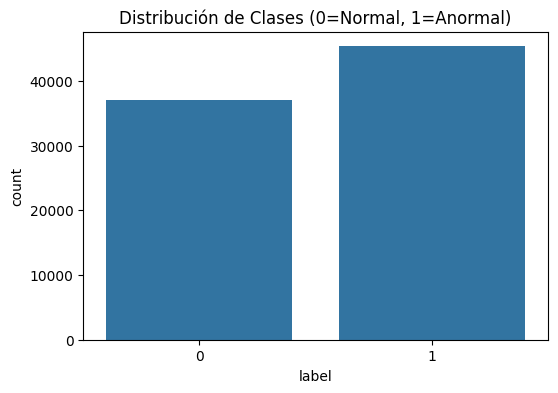

Normal: 44.94% | Malicioso: 55.06%


In [13]:
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=training_set)
plt.title('Distribución de Clases (0=Normal, 1=Anormal)')
plt.show()

# Porcentajes
class_dist = training_set['label'].value_counts(normalize=True) * 100
print(f"Normal: {class_dist[0]:.2f}% | Malicioso: {class_dist[1]:.2f}%")

## Analisis de las variables cagtegoricas: protocolos, servicios y estados comunes

Gráfico 1: visualizamos los 5 primeros protocolos más comunes en el trafico de red, donde TCP y udp son lo más usados

Gráfico 2: visualizamos los 5 primeros servicios más comunes en el tráfico de red, donde HTTP y DNS suelen ser los mas utilizados y visualizamos servicios con "-" donde no se asocia a ninguno en especifico

Grádico 3: visualizamos los 5 primeros estados mas comunes de las conexiones:
  - FIN (finalizacion de conexión)
  - INT (interrumpido)
  - CON (conectado)
  - REQ (solicitud)

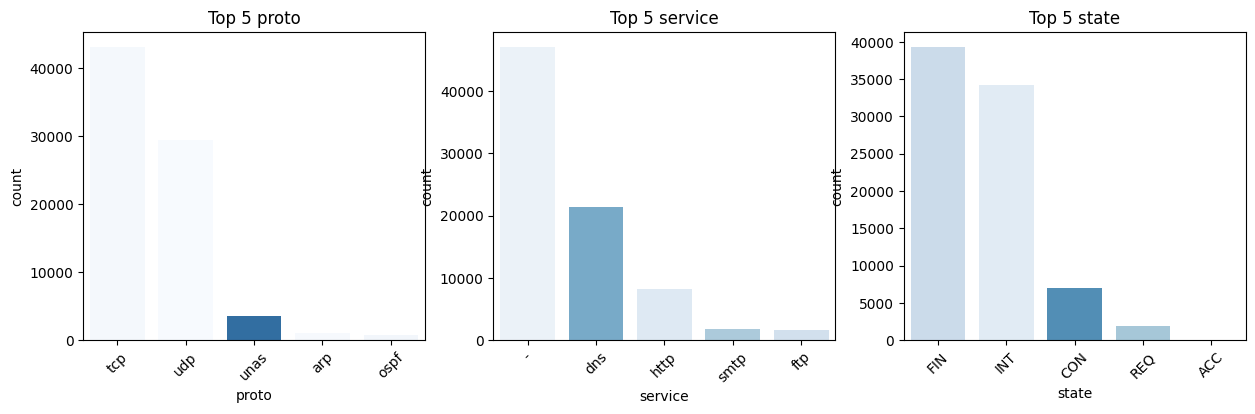

In [14]:
categorical_cols = ['proto', 'service', 'state']
plt.figure(figsize=(15, 4))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(1, 3, i)
    sns.countplot(x=col, data=training_set, hue=col, palette='Blues',
                  order=training_set[col].value_counts().index[:5], legend=False)
    plt.title(f'Top 5 {col}')
    plt.xticks(rotation=45)

### Cruzar las variables con label

Podemos visualizar en los tres gráficos con que tipo de servicio, protocolo y estado (dentri de los más utilizados) es más frecuente que el trafico sea malicioso.

Por ejemplo udp tiene mayor proporción de ataques que de trafico normal. Al igual que dns y conexión iterrrumpida.

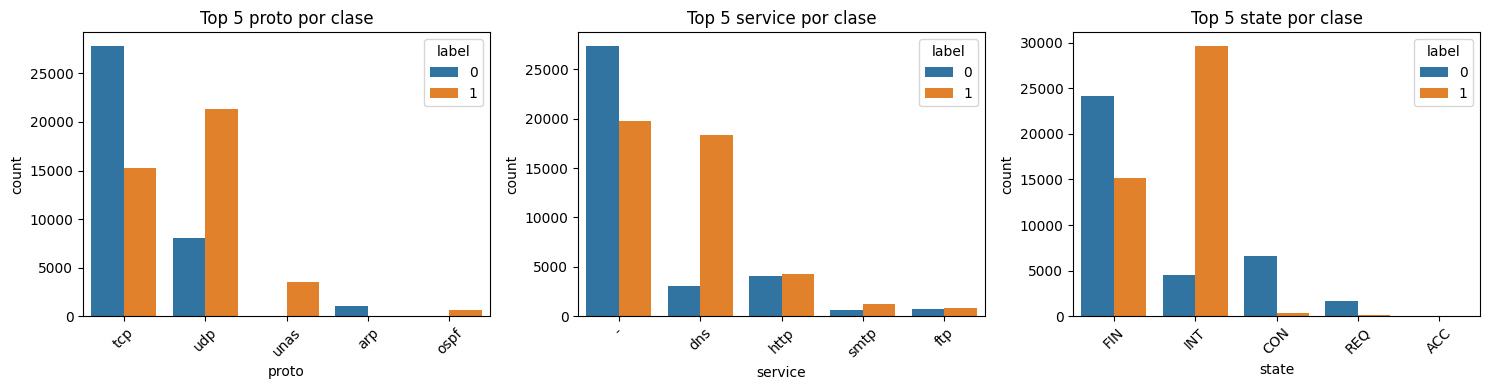

In [15]:
numeric_cols = training_set.select_dtypes(include=['int64', 'float64']).columns.drop(['id', 'label']).tolist()

plt.figure(figsize=(15, 4))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(1, 3, i)
    sns.countplot(x=col, data=training_set, hue='label',
                 order=training_set[col].value_counts().index[:5])
    plt.title(f'Top 5 {col} por clase')
    plt.xticks(rotation=45)
plt.tight_layout()

## Análisis de las columnas dur, sbytes, dbytes

Gráfico 1 dur (duración): podemos observar que hay una gran conentracion cerca de 0, lo que significa conexiones muy cortas

Gráfico 2 sbytes (bytes enviados) y gráfico 3 dbytes (bytes recibidos): presentan valores extremos


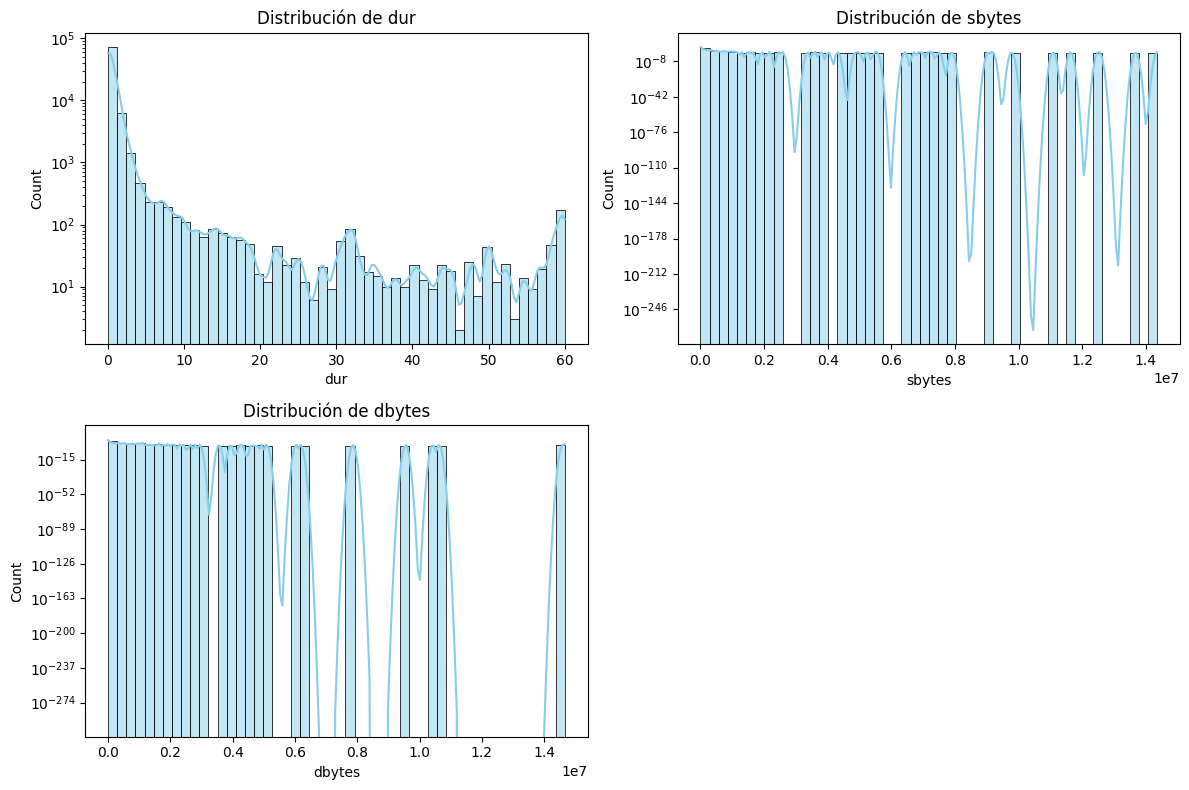

In [16]:
variables = ['dur', 'sbytes', 'dbytes']

plt.figure(figsize=(12, 8))
for i, var in enumerate(variables, 1):
    plt.subplot(2, 2, i)
    sns.histplot(training_set[var], bins=50, kde=True, color='skyblue')
    plt.title(f'Distribución de {var}')
    plt.yscale('log')
plt.tight_layout()
plt.show()

## Análisis de outliers

Visualizamos los valores extremos en las variables de bytes enviados y recibidos.

En este caso valores extremos pueden significar ataques como DDoS

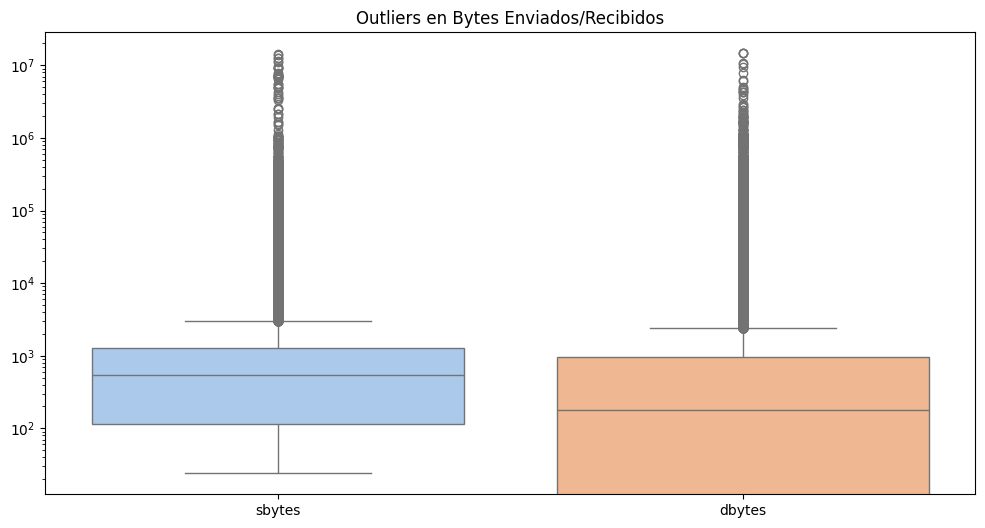

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=training_set[['sbytes', 'dbytes']], palette='pastel')
plt.title('Outliers en Bytes Enviados/Recibidos')
plt.yscale('log')
plt.show()

### Analisis de sbytes
Podemos ver que la distribución por clase
- 64.58% del trafico normal
- 35.42% del trafico malicioso

La mayoria de los valores extremos en bytes enviados corresponden a trafico normal y que muchos servicios legitimos pueden generar tráfico pesado ocacionalmente.

Análisis de dbytes
- 72.12% del trafico es normal
- 27.88% del trafico es malicioso



In [18]:
for col in ['sbytes', 'dbytes']:
    q1 = training_set[col].quantile(0.25)
    q3 = training_set[col].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5*iqr

    outliers = training_set[training_set[col] > upper_bound]
    print(f"\nAnálisis de outliers en {col}:")
    print(f"- Límite superior para outliers: {upper_bound:.2f}")
    print(f"- Número de outliers: {len(outliers)}")
    print(f"- Porcentaje de outliers: {len(outliers)/len(training_set)*100:.2f}%")
    print(f"- Mediana de los outliers: {outliers[col].median():.2f}")

    # variable label
    print("\nDistribución por clase en outliers:")
    print(outliers['label'].value_counts(normalize=True))


Análisis de outliers en sbytes:
- Límite superior para outliers: 3029.00
- Número de outliers: 9270
- Porcentaje de outliers: 11.26%
- Mediana de los outliers: 8946.00

Distribución por clase en outliers:
label
0    0.645847
1    0.354153
Name: proportion, dtype: float64

Análisis de outliers en dbytes:
- Límite superior para outliers: 2390.00
- Número de outliers: 12308
- Porcentaje de outliers: 14.95%
- Mediana de los outliers: 16290.00

Distribución por clase en outliers:
label
0    0.721157
1    0.278843
Name: proportion, dtype: float64


Seleccionamos registros donde los valores bytes enviados son verdaderamente extremos,  (sbytes > 1M)

Cuando se supera esta cantidad de bytes los registros indican que el 100% son ataques.



In [19]:
high_sbytes = training_set[training_set["sbytes"] > 1e6]

print("Clases en registros con sbytes extremos:")
print(high_sbytes["label"].value_counts(normalize=True))

Clases en registros con sbytes extremos:
label
1    1.0
Name: proportion, dtype: float64


### Analisis de outliers por clase

####Gráfico de dispersión: Bytes enviados (sbytes) vs. bytes recibidos (dbytes)



Este gráfico muestra la relación entre el volumen de datos enviados (eje X) y recibidos (eje Y), diferenciando el tráfico normal (verde) del malicioso (rojo).

Los patrones observados presentan comportamientos típicos para cada clase

1. Tráfico normal:
- Se concentran en la zona izquierda inferior (sbytes y dbytes con valores bajos) lo que indica conexiones con volúmenes modereados y equilibrados entre envío/recepción.
- Ls puntos verdes aislados en zonas de volumen alto (esquina superior derecha) representan actividades legitimas pero inusuales, como descarga de archivos grandes que pueden generar falsos positivos.

2. Tráfico malicioso:
- Ataques de alto envío (DDos), los puntos rojos en el extremo derecho del eje X (valores altos de sbytes) inidcan intentos de saturación de red, caracteristica de estos ataques.
- Descargas sospechosas, los puntos rojos en el extremo superior del eje Y (valores de alto dbytes) pueden inicar descargas de malware


Informacion importante:
- Los ataques tienden a manifestarse en regiones asociadas a valores extremos de envío masivo o recepción masiva de datos.
- El tráfico normal sigue patrones predecibles con volúmenes balanceados y moderados.
- Los valores extremos (por ejemplo sbytes > 1000000) son casi exclusivamente maliciosos, lo que implica utilidad como inidcador de ataques.

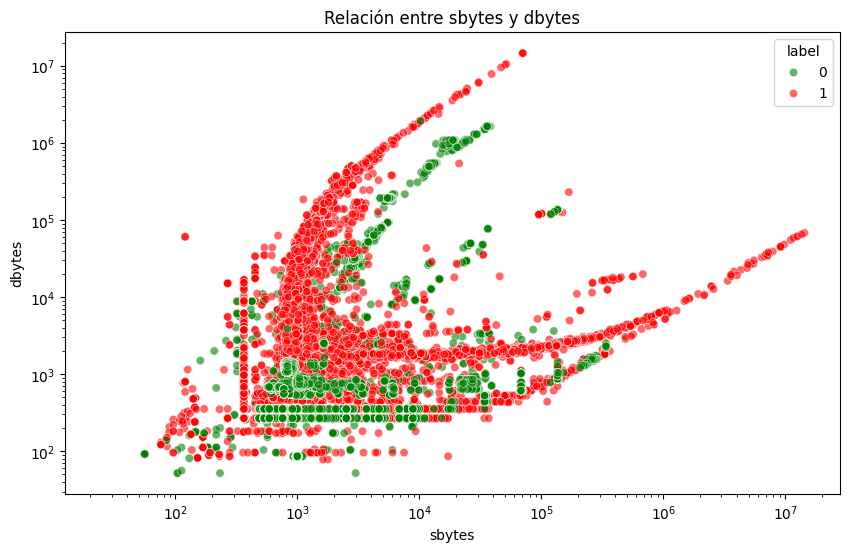

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="sbytes",
    y="dbytes",
    hue="label",
    data=training_set,
    palette={0: "green", 1: "red"},
    alpha=0.6
)
plt.xscale("log")
plt.yscale("log")
plt.title("Relación entre sbytes y dbytes")
plt.show()

### Protocolos y servicios cuando hay ataque

#### Protocolos más frecuentes en ataques

Podemos ver que udp lidera con 21321 casos


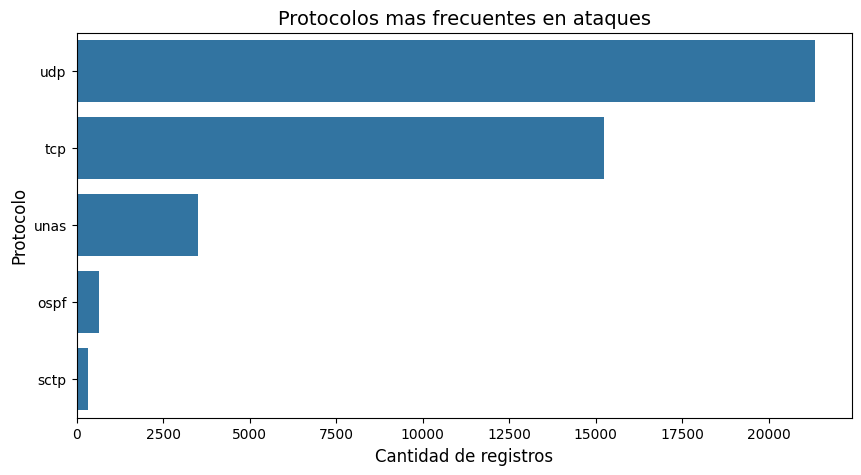

proto
udp         21321
tcp         15247
unas         3515
ospf          638
sctp          324
            ...  
sccopmce       32
iplt           32
pipe           32
sps            32
ib             31
Name: count, Length: 129, dtype: int64


In [21]:
ataques = training_set[training_set["label"] == 1]

top_protocolos = ataques["proto"].value_counts().nlargest(5)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_protocolos.values, y=top_protocolos.index)
plt.title("Protocolos mas frecuentes en ataques", fontsize=14)
plt.xlabel("Cantidad de registros", fontsize=12)
plt.ylabel("Protocolo", fontsize=12)
plt.show()

mask = (training_set.label == 1)
print(training_set.loc[mask,:].proto.value_counts())

#### Tipos de ataques por protocolos

Este gráfico muestra como se distribuyen los diferentes tipos de ataques según el protocolo de red utilizado.



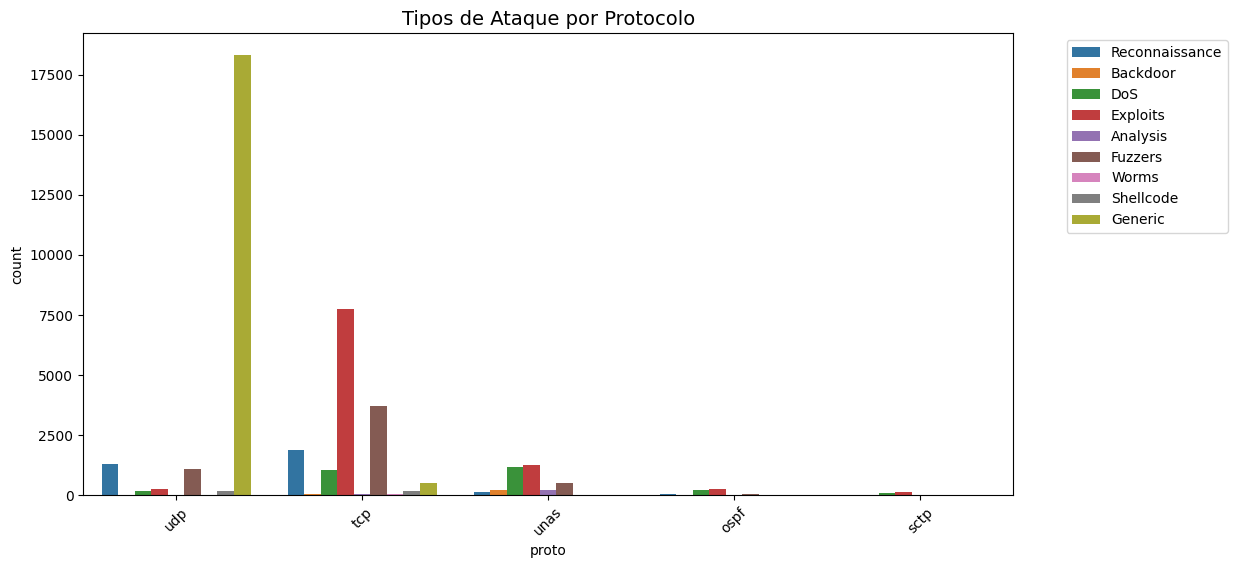

In [22]:
if "attack_cat" in training_set.columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(
        x="proto",
        hue="attack_cat",
        data=ataques,
        palette="tab10",
        order=ataques["proto"].value_counts().iloc[:5].index  # Top 5 protocolos
    )
    plt.title("Tipos de Ataque por Protocolo", fontsize=14)
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.show()

#### Servicios mas frecuentes en ataques

Este gráfico muestra que servicios son los principales obejtivos de ciberataques

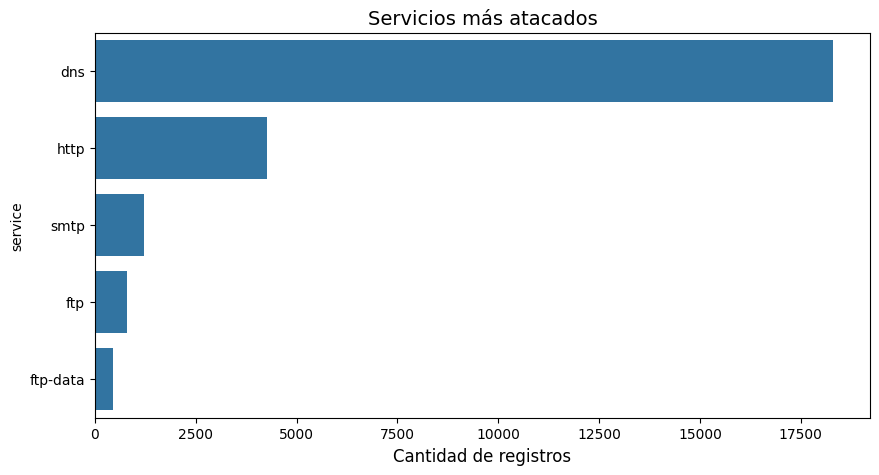

service
-           19778
dns         18299
http         4274
smtp         1216
ftp           794
ftp-data      447
pop3          423
ssl            30
snmp           29
dhcp           26
radius          7
irc             5
ssh             4
Name: count, dtype: int64


In [23]:
top_servicios = ataques[ataques["service"] != "-"]["service"].value_counts().nlargest(5)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_servicios.values, y=top_servicios.index)
plt.title("Servicios más atacados", fontsize=14)
plt.xlabel("Cantidad de registros", fontsize=12)
plt.show()

mask = (training_set.label == 1)
print(training_set.loc[mask,:].service.value_counts())

#### Servicios por tipos de ataques

Este gráfico muestra los tipos de ataques que aparecen en cada servicio

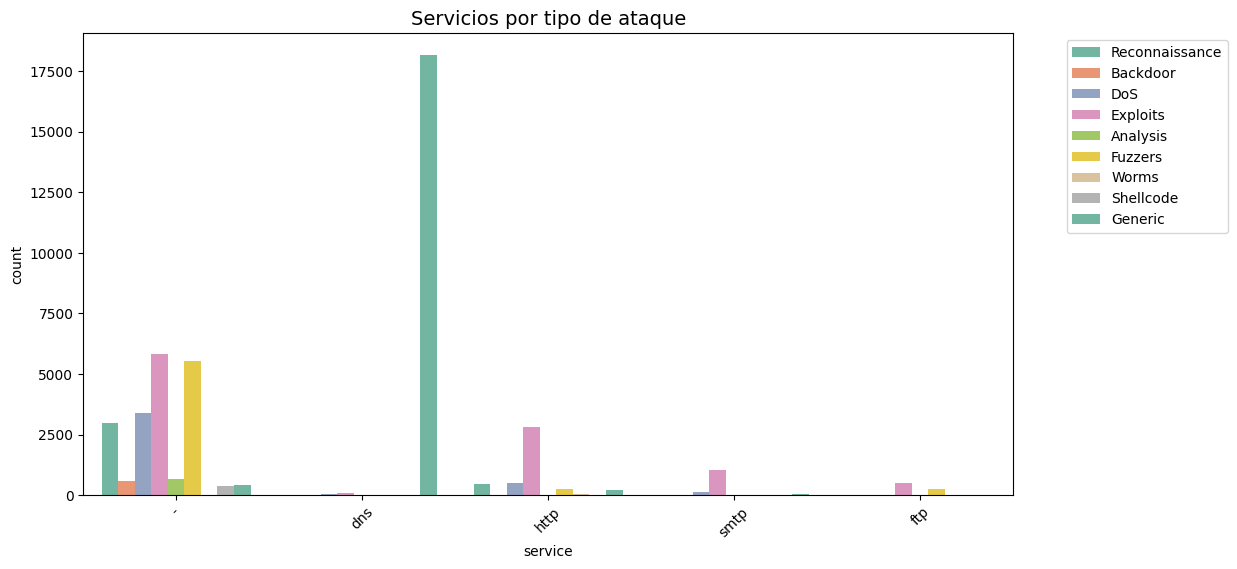

service
-           27375
http         4013
dns          3068
ftp-data      949
ftp           758
smtp          635
ssh           200
radius          2
Name: count, dtype: int64


In [24]:
if "attack_cat" in training_set.columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(
        x="service",
        hue="attack_cat",
        data=ataques,
        palette="Set2",
        order=ataques["service"].value_counts().iloc[:5].index
    )
    plt.title("Servicios por tipo de ataque", fontsize=14)
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.show()

mask = (training_set.label == 0)
print(training_set.loc[mask,:].service.value_counts())


## Clasificación de ataques

Este grafico nos muestra con detalle que categorías son mas frecuentes en el conjunto de datos.

Se puede observar que Generic y Exploits representan la gran parte del total de ataques y worms son los menos frecuentes.

attack_cat
Generic           18871
Exploits          11132
Fuzzers            6062
DoS                4089
Reconnaissance     3496
Analysis            677
Backdoor            583
Shellcode           378
Worms                44
Name: count, dtype: int64


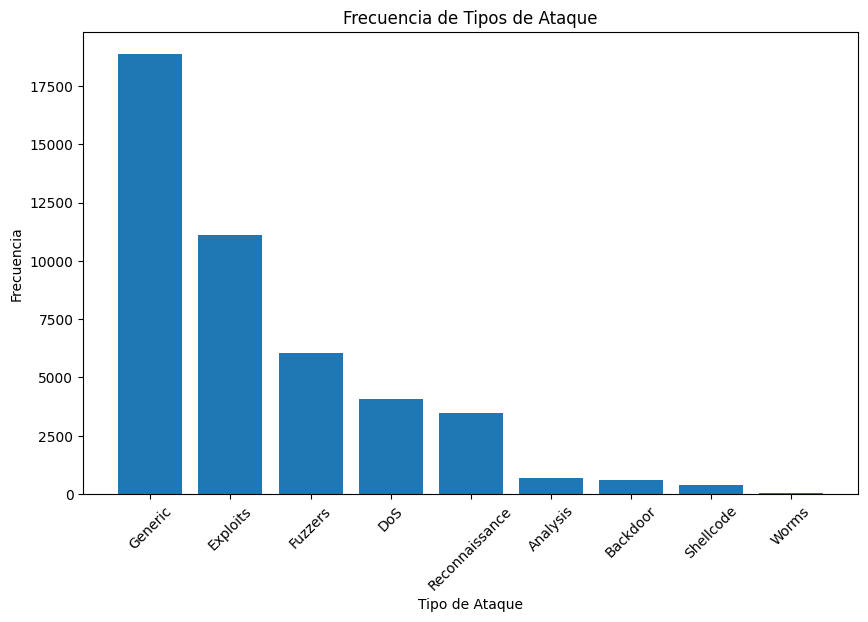

In [25]:
ataques = training_set[training_set['label']==1]['attack_cat'].value_counts()
print(ataques)

plt.figure(figsize=(10, 6))
plt.bar(ataques.index, ataques.values)
plt.xlabel('Tipo de Ataque')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Tipos de Ataque')
plt.xticks(rotation=45)
plt.show()

## Matriz de correlación

Obejtivo: identificar correlaciones entre variables que puedan influir en la detección de ataques

Correlaciones fuertes:

- sbytes y spkts (0.97)
- dbytes y dpkts (0.98)

El volumen de bytes enviados/recibidos está directamente relacionado al numero de paquetes.

- ct_ftp_cmd y is_ftp_login (0.99)

Ambas capturan actividad FTP

- swin y dwin (0.96)

Las ventanas TCP de origen/destino estan relacionadas


- ct_srv_src y ct_srv_dst (0.93)

Ambas miden conexiones por servicio.

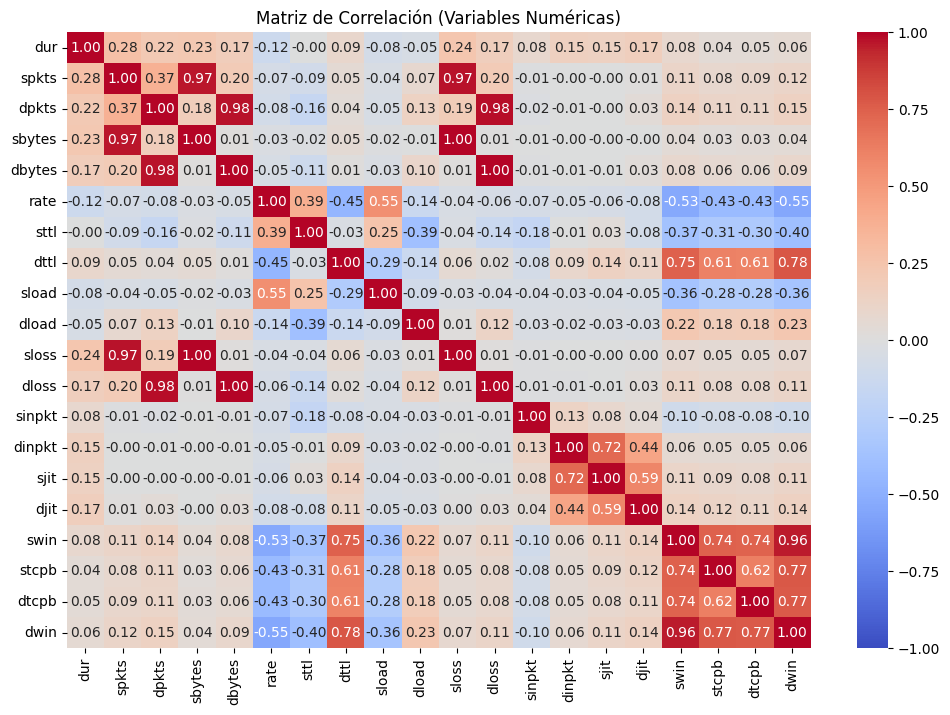

In [26]:
numeric_cols = training_set.select_dtypes(include=['int64', 'float64']).columns.drop(['id', 'label']).tolist()
numeric_data = training_set[numeric_cols]

corr_matrix = numeric_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix.iloc[:20, :20], annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Matriz de Correlación (Variables Numéricas)")
plt.show()

In [27]:
# Pares de variables con correlación > 0.9
corr = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.9:
            corr.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))


corr_df = pd.DataFrame(corr, columns=["Variable 1", "Variable 2", "Correlación"])
print(" Variables altamente correlacionadas:")
display(corr_df)

 Variables altamente correlacionadas:


,Variable 1,Variable 2,Correlación
0,sbytes,spkts,0.965750
1,dbytes,dpkts,0.976419
2,sloss,spkts,0.973644
3,sloss,sbytes,0.995027
4,dloss,dpkts,0.981506
5,dloss,dbytes,0.997109
6,dwin,swin,0.960125
7,synack,tcprtt,0.939473
8,ct_src_dport_ltm,ct_dst_ltm,0.960401
9,ct_dst_sport_ltm,ct_src_dport_ltm,0.911637


# 4. Preprocesamiento

Objetivos del preprocesamiento:
- Manejar variables categoricas
- Transformar variables numericas

Tener en cuenta:
- Valores no definidos como "-" en servicios
- Variables correlacionadas
- Importancia de los outliers (pueden ser ataques reales)

##Definir columnas categoricas y numericas

In [28]:
#columnas numericas aquitando id y label
numeric_cols = training_set.select_dtypes(include=['int64', 'float64']).columns.drop(['id', 'label']).tolist()
#columnas categoricas
categorical_cols = ['proto', 'service', 'state']

## Manejo de variables correlacionadas

Para evitar multicolinealidad, se identificaron pares de variables con correlación > 0.9

La eliminación se basará en la relevancia para ciberseguridad, conservando las caracteristicas con más significado en la detección de ataques, las variables que sean más claras y faciles de explicar en relación a esto.



#### Desiciones especificas por grupo correlacionado

Bytes y Paquetes

| Variables         | Correlación | Decisión         | Justificación                                                    |
|------------------|-------------|------------------|------------------------------------------------------------------|
| sbytes - spkts   | 0.966       | Conservar sbytes | Los bytes son más directos para detectar ataques volumétricos    |
| dbytes - dpkts   | 0.976       | Conservar dbytes | El volumen de datos recibidos es más significativo que el conteo de paquetes |




Perdida de paquetes

| Variables         | Correlación | Decisión       | Justificación                                                       |
|------------------|-------------|----------------|----------------------------------------------------------------------|
| sloss - spkts    | 0.974       | Eliminar sloss | Sbytes que está altamente correlacionado             |
| sloss - sbytes   | 0.995       | Eliminar sloss | Mide casi lo mismo que sbytes                              |
| dloss - dpkts    | 0.982       | Eliminar dloss | Redundante con dbytes                            |
| dloss - dbytes   | 0.997       | Eliminar dloss | Redundante con dbytes                        |
| is_sm_ips_ports - sinpkt | 0.945       | Eliminar is_sm_ips_ports | El tiempo entre paquetes es más útil para detectar anomalías tiempo               |




Ventanas TCP

| Variables       | Correlación | Decisión       | Justificación                                      |
|----------------|-------------|----------------|----------------------------------------------------|
|dwin - swin | 0.960      | Conservar dwin | La ventana de recepción tiende a ser más relevante
                |




Tiempos TCP

| Variables       | Correlación | Decisión       | Justificación                                      |
|----------------|-------------|----------------|----------------------------------------------------|
| synack - tcprtt| 0.939       | Conservar tcprtt | El RTT completo es más informativo                |

Conexiones FTP

| Variables       | Correlación | Decisión       | Justificación                                      |
|----------------|-------------|----------------|----------------------------------------------------|
| ct_ftp_cmd - is_ftp_login | 0.994       | Conservar is_ftp_login |  Variable binaria más simple y clara
       |

Estadisticas de conexion (Features CT)


| Variables                          | Correlación | Decisión               | Justificación                                                                 |
|-----------------------------------|-------------|------------------------|-------------------------------------------------------------------------------|
| ct_src_dport_ltm - ct_dst_ltm     | 0.960       | Conservar ct_dst_ltm   | Mejor indicador de escaneos a múltiples destinos                              |
| ct_dst_sport_ltm - ct_src_dport_ltm | 0.912     | Eliminar ct_dst_sport_ltm | Redundante con otras métricas de puertos                                  |
| ct_dst_src_ltm - ct_srv_src       | 0.934       | Conservar ambas        | Proporcionan perspectivas complementarias (origen-destino vs servicio)       |
| ct_srv_dst - ct_srv_src           | 0.978       | Conservar ct_srv_src   | La perspectiva desde el origen es más útil para detección temprana           |
| ct_src_ltm - ct_dst_ltm           | 0.932       | Eliminar ct_src_ltm    | ct_dst_ltm captura mejor los patrones de ataque                              |


### Eliminamos las correlacionadas y los datos irrelevantes

In [29]:
cols_drop = [
    'id',
    'attack_cat',
    # Redundantes con bytes
    'spkts',       #0.97 corr
    'dpkts',       #0.98 corr
    'sloss',       #0.995 corr
    'dloss',       #0.997 corr

    # Redundantes en conexiones
    'swin',        # 0.96 corr
    'synack',      # 0.94 corr
    'ct_ftp_cmd',  # 0.99 corr

    # Estadísticas de conexión redundantes
    'ct_src_dport_ltm',
    'ct_dst_sport_ltm',
    'ct_srv_dst',
    'ct_src_ltm'
]

training_clean = training_set.drop(columns=cols_drop)
testing_clean = testing_set.drop(columns=cols_drop)

Verificamos que las columnas queden eliminadas

In [30]:
training_clean.columns

Index(['dur', 'proto', 'service', 'state', 'sbytes', 'dbytes', 'rate', 'sttl',
       'dttl', 'sload', 'dload', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'stcpb',
       'dtcpb', 'dwin', 'tcprtt', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_dst_src_ltm', 'is_ftp_login', 'ct_flw_http_mthd', 'is_sm_ips_ports',
       'label'],
      dtype='object')

In [31]:
testing_clean.columns

Index(['dur', 'proto', 'service', 'state', 'sbytes', 'dbytes', 'rate', 'sttl',
       'dttl', 'sload', 'dload', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'stcpb',
       'dtcpb', 'dwin', 'tcprtt', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_dst_src_ltm', 'is_ftp_login', 'ct_flw_http_mthd', 'is_sm_ips_ports',
       'label'],
      dtype='object')

##Tratamiento de valores campo 'service"

### Analisis del problema:

En el dataset el campo "service" contiene valores  "-" que hace referencia a un servicio no especificado o desconocido. Estos pueden introducir ruido en el modelo.



In [32]:
print("Distribución de 'service':")
print(training_set['service'].value_counts(dropna=False))

Distribución de 'service':
service
-           47153
dns         21367
http         8287
smtp         1851
ftp          1552
ftp-data     1396
pop3          423
ssh           204
ssl            30
snmp           29
dhcp           26
radius          9
irc             5
Name: count, dtype: int64


### Estrategia de imputación basada en Dominio

Remplazar los valores "-" por la moda (valor más frecuente) segun la clase.

- Para tráfico normal el servicio más común es http con 4013 registros, representando tráfico legítimo

- Para tráfico malicioso el servicio más atacado es dns con 18299 registros, relacionado con ataques

Opciones como eliminar registros con "-" fueron descartadas para no perder un volúmen tan grande de información

Tráfico normal:

In [33]:
print(training_clean[training_set["label"] == 0]["service"].value_counts())

service
-           27375
http         4013
dns          3068
ftp-data      949
ftp           758
smtp          635
ssh           200
radius          2
Name: count, dtype: int64


Tráfico malicioso:

In [34]:
print(training_clean[training_set["label"] == 1]["service"].value_counts())

service
-           19778
dns         18299
http         4274
smtp         1216
ftp           794
ftp-data      447
pop3          423
ssl            30
snmp           29
dhcp           26
radius          7
irc             5
ssh             4
Name: count, dtype: int64


### Implementacion

Vamos a reemplazar con los servicios mencionados anteriormente para cada clase

In [35]:
# Reemplazar "-" por "http" en tráfico normal
training_clean.loc[
    (training_clean["label"] == 0) & (training_clean["service"] == "-"),
    "service"
] = "http"

# Reemplazar "-" por "dns" en tráfico malicioso
training_clean.loc[
    (training_clean["label"] == 1) & (training_clean["service"] == "-"),
    "service"
] = "dns"

Validación de la imputación

In [36]:
print("Distribución en entrenamiento (label=0):")
print(training_clean[training_clean["label"] == 0]["service"].value_counts())

print("\nDistribución en entrenamiento (label=1):")
print(training_clean[training_clean["label"] == 1]["service"].value_counts())

Distribución en entrenamiento (label=0):
service
http        31388
dns          3068
ftp-data      949
ftp           758
smtp          635
ssh           200
radius          2
Name: count, dtype: int64

Distribución en entrenamiento (label=1):
service
dns         38077
http         4274
smtp         1216
ftp           794
ftp-data      447
pop3          423
ssl            30
snmp           29
dhcp           26
radius          7
irc             5
ssh             4
Name: count, dtype: int64


## Preprocesamiento con ColumnTransformer

EL preprocesamiento se implementó mediante ColumnTransformer, aplicando transformaciones especificas a distintos tipos de datos:

Variables categóricas: se codificaron con OneHotEncoder, configurando para ignorar categorías no vistas en el entrenamiento.

Variables numéricas: se estandarizaron con StandarScaler para normalizar sus escalas

Parámetro remainder="passthrough", conserva cualquier columna que no esté en las transformaciones anteriores

In [37]:
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ('num', StandardScaler(), training_clean.select_dtypes(include=['int64', 'float64']).columns.drop(['label']).tolist())
    ],
    remainder="passthrough"
)

Consistencia dimensional después de aplicar proccessor

Dataset original: 82,332 registros × 32 features

Dataset transformado: 82,332 registros × 179 features

In [38]:
X_train_transformed = preprocessor.fit_transform(training_clean)
print(f"Forma original: {training_clean.shape}")
print(f"Forma transformada: {X_train_transformed.shape}")

cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
num_features = training_clean.select_dtypes(include=['int64', 'float64']).columns.drop(['label']).tolist()
all_features = list(cat_features) + num_features

Forma original: (82332, 32)
Forma transformada: (82332, 179)


## Estructura del Pipeline

El pipeline contiene:

La etapa de preprocesamiento que realiza codificacion One-Hot, estandarizacion de variables numericas y manejo de valores desconocidos

Modelo Random Forest con ajustes de hiperparámetros:

 - max_depth=25: Profundidad mayor para capturar patrones complejos
    - este aumento permite aprender relaciones más complejas en los datos, donde los ataques pueden ser más sutiles

- class_weight={0: 1, 1: 5}:
    - ajustar class weight prioriza la detección de ataques

- min_samples_leaf=3:
    - Para reducir sobreajuste, ayuda a evitar que los árboles se ajusten demasiado a ruidos en los datos

- n_estimators=200: Más árboles para mayor estabilidad
  -más estimadores mejoran la robustez del modelo sin afectar significativamente el tiempo de entrenamiento

In [59]:
modelo_rf = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(
        random_state=42,
        max_depth=25,
        class_weight={0: 1, 1: 5},
        min_samples_leaf=3,
        n_estimators=200,
        n_jobs=-1
    ))
])

## Validación cruzada
para evaluar robustamente el modelo se aplicó validación cruzada estratificada (5 folds)

Uso de F1-Score macro:
- Balance: considera ambas clases por igual
- Seguridad: equilibra precisión y recall (evitar falsos negativos en ataques)


Los resultados mostraron un desempeño consistente en todos los folds

In [60]:
scorer = make_scorer(f1_score, average="macro")  # Métrica: F1-Score (balance entre precisión y recall)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # 5  folds

cv_scores = cross_val_score(
    modelo_rf,  # Pipeline completo (preprocesamiento + modelo)
    training_clean.drop("label", axis=1),  # Features (X)
    training_clean["label"],  # Target (y)
    cv=cv,  # Estrategia de validación
    scoring=scorer  # Métrica de evaluación
)

print("=== Resultados de Validación Cruzada ===")
print(f"F1-Score (Macro) por fold: {cv_scores}")
print(f"F1-Score promedio: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")

=== Resultados de Validación Cruzada ===
F1-Score (Macro) por fold: [0.99195632 0.99103495 0.98949563 0.99152489 0.99048048]
F1-Score promedio: 0.99 ± 0.00


# 5. Modelo y evaluación

### Random Forest

Es un algoritmo de aprendizaje supervisado basado que combina múltiples árboles de desición para mejorar la precision y robustez de las predicciones, que se utiliza tanto para tareas de clasificación como tareas de regresión.

Cada árbol se entrena con una muestra aleatoria del conjunto de datos y proporciona una predcción independiente.

La decisión final del modelo se basa en l mayoría de las predicciones individiales para tareas de clasificación como en este caso.

Este algoritmo reduce el riesgo de sobreajuste y mejora la presición.

Se implementó un modelo de Random Forest debido a su capacidad para manejar datos no lineales y la presencia de outliers, comunes en tráfico de red, además de ser menos sensible a los datos ruidosos y a las variaciones en el conjunto de datos de entrenamiento.

## Entrenar Modelo

In [61]:
modelo_rf.fit(
    training_clean.drop("label", axis=1),
    training_clean["label"]
)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['proto', 'service',
                                                   'state']),
                                                 ('num', StandardScaler(),
                                                  ['dur', 'sbytes', 'dbytes',
                                                   'rate', 'sttl', 'dttl',
                                                   'sload', 'dload', 'sinpkt',
                                                   'dinpkt', 'sjit', 'djit',
                                                   'stcpb', 'dtcpb', 'dwin',
                                                   'tcprtt', 'ackdat', 'smean',
                                                   'dmean', 'trans_depth',
                                                   'response_body_len',
                                                   'ct_srv_src', 'ct_state_ttl',
                                                   'ct_dst_ltm',
                                                   'ct_dst_src_ltm',
                                                   'is_ftp_login',
                                                   'ct_flw_http_mthd',
                                                   'is_sm_ips_ports'])])),
                ('classifier',
                 RandomForestClassifier(class_weight={0: 1, 1: 5}, max_depth=25,
                                        min_samples_leaf=3, n_estimators=200,
                                        n_jobs=-1, random_state=42))])

## Evaluación en el conjunto de Test

Interpretación de los resultados:

El modelo presenta una exactitud (accuracy) del 93%, clasificando correctamente la mayoría de los casos.

Tráfico normal:
- Precision: el 97% de las predicciones positivas para tráfico normal fueron correctas.
- Recall: solo identificó correctamente el 81% de los casos en esta clase.


Tráfico malicioso:

- Precisión: uando el modelo predice trafico malicioso acierta el 92%

- Recall en Ataques: Detecta el 99% de los ataques reales

- F1-Score en ataques: alto equilibrio entre precisión y recall

In [62]:
y_pred_rf = modelo_rf.predict(
    testing_clean.drop("label", axis=1)
)

print("=== Random Forest ===")
print(classification_report(testing_clean["label"], y_pred_rf))
from sklearn.metrics import confusion_matrix, classification_report

=== Random Forest ===
              precision    recall  f1-score   support

           0       0.97      0.81      0.88     56000
           1       0.92      0.99      0.95    119341

    accuracy                           0.93    175341
   macro avg       0.94      0.90      0.92    175341
weighted avg       0.93      0.93      0.93    175341



## Matriz de confusión

Interpretación

- 45407 registros normales correctamente clasificados.

- 117834 ataques correctamente identificados.

- 10593 registros normales marcados como ataques (falsas alarmas)
 - Causas posibles: tráfico legitimo con patrones atípicos como mencionamos en el EDA, como descargas grandes.

- 1507 ataques no detectados (riesgo de seguridad).
  - Causas posibles: ataques que imitan tráfico normal




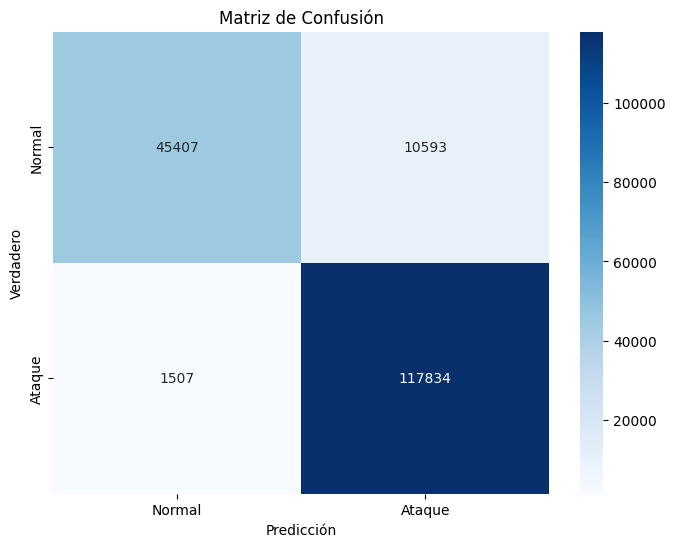


Matriz de Confusión:
[[ 45407  10593]
 [  1507 117834]]


In [58]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(testing_clean["label"], y_pred_rf), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Ataque'],
            yticklabels=['Normal', 'Ataque'])
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Verdadero")
plt.show()

conf_matrix = confusion_matrix(testing_clean["label"], y_pred_rf)
print("\nMatriz de Confusión:")
print(conf_matrix)

## Sección de Comparación

##  Random Forest con SMOTE

Se evaluó el uso de SMOTE para balancear las clases, pero los resultados mostraron que no hubo mejora significatiba en el rendimiento del modelo, posibblemente por que el desbalance original era leve


In [44]:
# Pipeline con SMOTE
modelo_rf_smote = Pipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(
        random_state=42,
    ))
])


# Validación cruzada con SMOTE
cv_scores_smote = cross_val_score(
    modelo_rf_smote,
    training_clean.drop("label", axis=1),
    training_clean["label"],
    cv=cv,
    scoring=make_scorer(f1_score, average='macro')
)
print(f"F1-Score con SMOTE: {cv_scores_smote.mean():.2f} ± {cv_scores_smote.std():.2f}")

F1-Score con SMOTE: 0.99 ± 0.00


In [45]:
#Entrenar el modelo final con todos los datos de entrenamiento
modelo_rf_smote.fit(training_clean.drop("label", axis=1), training_clean["label"])

#Evaluar en el conjunto de prueba
y_pred_smote = modelo_rf_smote.predict(testing_clean.drop("label", axis=1))

print("\n== Random forest - SMOTE ==")
print(classification_report(testing_clean["label"], y_pred_smote))


== Random forest - SMOTE ==
              precision    recall  f1-score   support

           0       0.95      0.82      0.88     56000
           1       0.92      0.98      0.95    119341

    accuracy                           0.93    175341
   macro avg       0.94      0.90      0.91    175341
weighted avg       0.93      0.93      0.93    175341



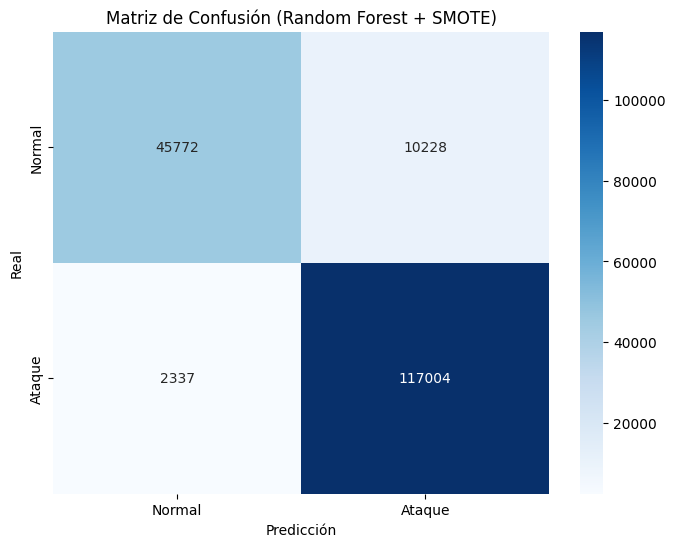

In [46]:
# Matriz de confusión
conf_matrix_smote = confusion_matrix(testing_clean["label"], y_pred_smote)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_smote, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Normal", "Ataque"],
            yticklabels=["Normal", "Ataque"])
plt.title("Matriz de Confusión (Random Forest + SMOTE)")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()



---



## Modelo Xgboost

XGBoost construye árboles secuencialmente, corrigiendo en cada nuevo árbol los errores del anterior, mejorando progresivamente las predicciones del modelo

El pipeline para este modelo contiene:

La etapa de preprocesamiento que realiza codificacion One-Hot, estandarizacion de variables numericas y manejo de valores desconocidos

Modelo xgboost con ajustes de hiperparámetros:

- max_depth=5: profundidad controlada para limitar la complejidad de cada arbol individual evitando el sobreajuste

- learning_rate=0.1: balance entre velocidad y precisión.

- n_estimators=200: Más árboles para mayor estabilidad -

In [69]:
modelo_xgb = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(
        random_state=42,
        eval_metric='logloss',
        max_depth=5,
        learning_rate=0.1,
        n_estimators=200,
    ))
])

### Entrenamiento y evaluación

Interpretación de los resultados:

El modelo presenta una exactitud (accuracy) del 92%, clasificando correctamente la mayoría de los casos.

Tráfico normal:

- Precision: el 95% de las predicciones positivas para tráfico normal fueron correctas.

- Recall:identificó correctamente el 80% de los casos en esta clase.

Tráfico malicioso:

- Precisión: uando el modelo predice trafico malicioso acierta el 91%

- Recall en Ataques: Detecta el 98% de los ataques reales

- F1-Score en ataques: alto equilibrio entre precisión y recall

In [70]:
# Entrenamiento y evaluación
modelo_xgb.fit(training_clean.drop("label", axis=1), training_clean["label"])
y_pred_xgb = modelo_xgb.predict(testing_clean.drop("label", axis=1))
print("\n== XGB ==")
print(classification_report(testing_clean["label"], y_pred_xgb ))


== XGB ==
              precision    recall  f1-score   support

           0       0.95      0.80      0.87     56000
           1       0.91      0.98      0.95    119341

    accuracy                           0.92    175341
   macro avg       0.93      0.89      0.91    175341
weighted avg       0.92      0.92      0.92    175341



### Matriz de confusion

45026 normales correctamente clasificados

116841 ataques correctamente identificados

10974 falsas alarmas (normales marcados como ataque)

2500 ataques no detectados (falsos negativos)

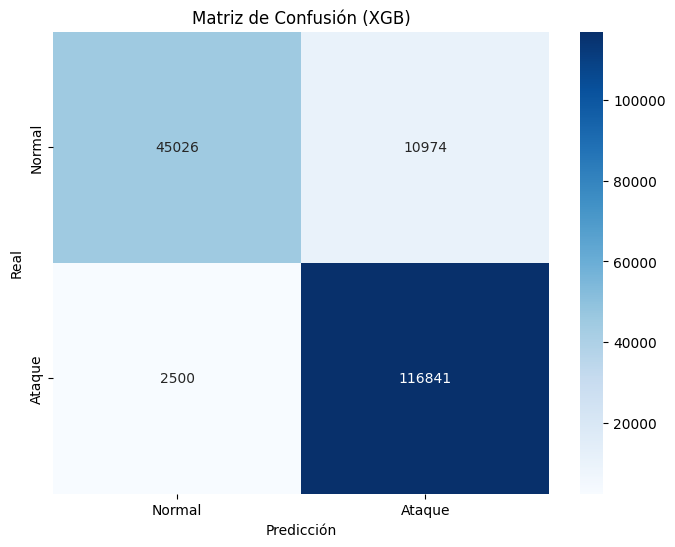


Matriz de Confusión:
[[ 45026  10974]
 [  2500 116841]]


In [71]:
#Matriz de confusión
conf_matrix_xgb = confusion_matrix(testing_clean["label"], y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Normal", "Ataque"],
            yticklabels=["Normal", "Ataque"])
plt.title("Matriz de Confusión (XGB)")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

print("\nMatriz de Confusión:")
print(conf_matrix_xgb)

## Comparación del rendimiento de los modelos: Random Forest vs XGBoost

Mediante la métrica ROC-AUC para comparar el desempeño de ambos modelos, se evalua la capacidad para distinguir entre clases.

Una curva más alejada de la línea punteada y más cérca del vértice superior izquierdo, así como un AUC más alto indica mejor rendimiento

En la gráfica random forest tiene un AUC de 0.982, mostrando un rendimiento muy alto

El modelo XGboost alcanzó un AUC de 0.975, también un rendimiento muy alto, pero ligeramente inferior a random forest

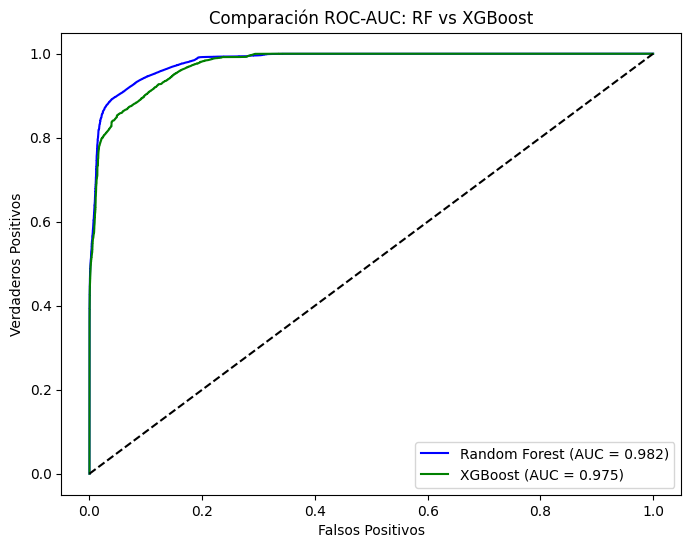

In [73]:
# Comparar curvas ROC de ambos modelos
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Calcular valores para Random Forest
fpr_rf, tpr_rf, _ = roc_curve(testing_clean["label"], modelo_rf.predict_proba(testing_clean.drop("label", axis=1))[:, 1])
auc_rf = roc_auc_score(testing_clean["label"], modelo_rf.predict_proba(testing_clean.drop("label", axis=1))[:, 1])

# Calcular valores para XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(testing_clean["label"], modelo_xgb.predict_proba(testing_clean.drop("label", axis=1))[:, 1])
auc_xgb = roc_auc_score(testing_clean["label"], modelo_xgb.predict_proba(testing_clean.drop("label", axis=1))[:, 1])

# Graficar las curvas ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.3f})', color='blue')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.3f})', color='green')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Falsos Positivos')
plt.ylabel('Verdaderos Positivos')
plt.title('Comparación ROC-AUC: RF vs XGBoost')
plt.legend()
plt.show()



---



# 6. Conclusión:

El modelo Random Forest demostró un desempeño importante en la detección de intrusiones, alcanzando un recall del 99% en la detección de ataques. Convirtiendolo en la mejor opción si se prioriza la seguridad.

Si bien el modelo genera un mayor volumen de falsos positivos (registros normales marcados como ataques), que puede provocar alertas innecesarias, puede justificarse si el objetivo principal es minimizar los riesgos de seguridad

Las falsas alarmas pueden gestionarse mediante filtros secundarios o umbrales ajustables para priorizar precision o recall según las necesidades.




# Bibliografía

[UNSW-NB15 network data set](https://ieeexplore.ieee.org/document/7348942)

[Explicación del dataset](https://drive.google.com/file/d/168OWJg72EdE6eb-IbLsuwfdoLTy5_4NN/view?usp=sharing
)

[CUTI: La ciberseguridad en uruguay un desafio urgente](https://cuti.org.uy/destacados/la-ciberseguridad-en-uruguay-un-desafio-urgente/)

[Verizon: DBIR
2023 Data Breach
Investigations Report
Public Sector Snapshot](https://www.verizon.com/business/resources/Te46/reports/2023-dbir-public-sector-snapshot.pdf)

[Scikit learn](https://scikit-learn.org/stable/)

[Random Forest](https://pianalytix.com/what-is-random-forest-algorithm-in-machine-learning/)

[Random Forest](https://www.ibm.com/mx-es/think/topics/random-forest)

[Xgboost](https://www.geeksforgeeks.org/xgboost/)

[Xgboost y Random forest](https://www.geeksforgeeks.org/difference-between-random-forest-vs-xgboost/
)


